# Data Understanding

# Machine Predictive Maintenance Classification 
Since real predictive maintenance datasets are generally difficult to obtain and in particular difficult to publish, we present and provide a synthetic dataset that reflects real predictive maintenance encountered in the industry to the best of our knowledge.

The dataset consists of 10 000 data points stored as rows with 14 features in columns

* UID: unique identifier ranging from 1 to 10000
* productID: consisting of a letter L, M, or H for low (50% of all products), medium (30%), and high (20%) as product quality variants and a variant-specific     serial number
* air temperature [K]: generated using a random walk process later normalized to a standard deviation of 2 K around 300 K
* process temperature [K]: generated using a random walk process normalized to a standard deviation of 1 K, added to the air temperature plus 10 K.
* rotational speed [rpm]: calculated from powepower of 2860 W, overlaid with a normally distributed noise
* torque [Nm]: torque values are normally distributed around 40 Nm with an Ïƒ = 10 Nm and no negative values.
* tool wear [min]: The quality variants H/M/L add 5/3/2 minutes of tool wear to the used tool in the process. 
* 'machine failure' label that indicates, whether the machine has failed in this particular data point for any of the following failure modes are true.

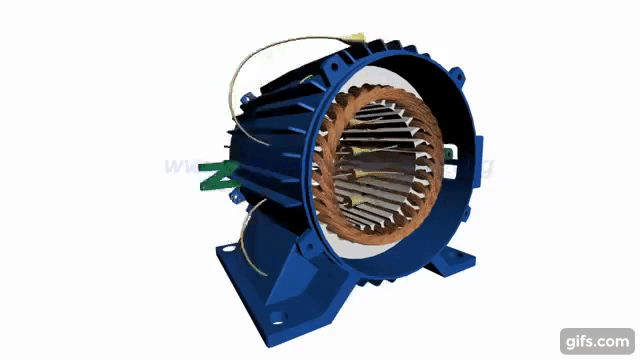

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("D:\\Studies\\Data\\Datasets\\predictive_maintenance.csv")
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


# Data Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [4]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


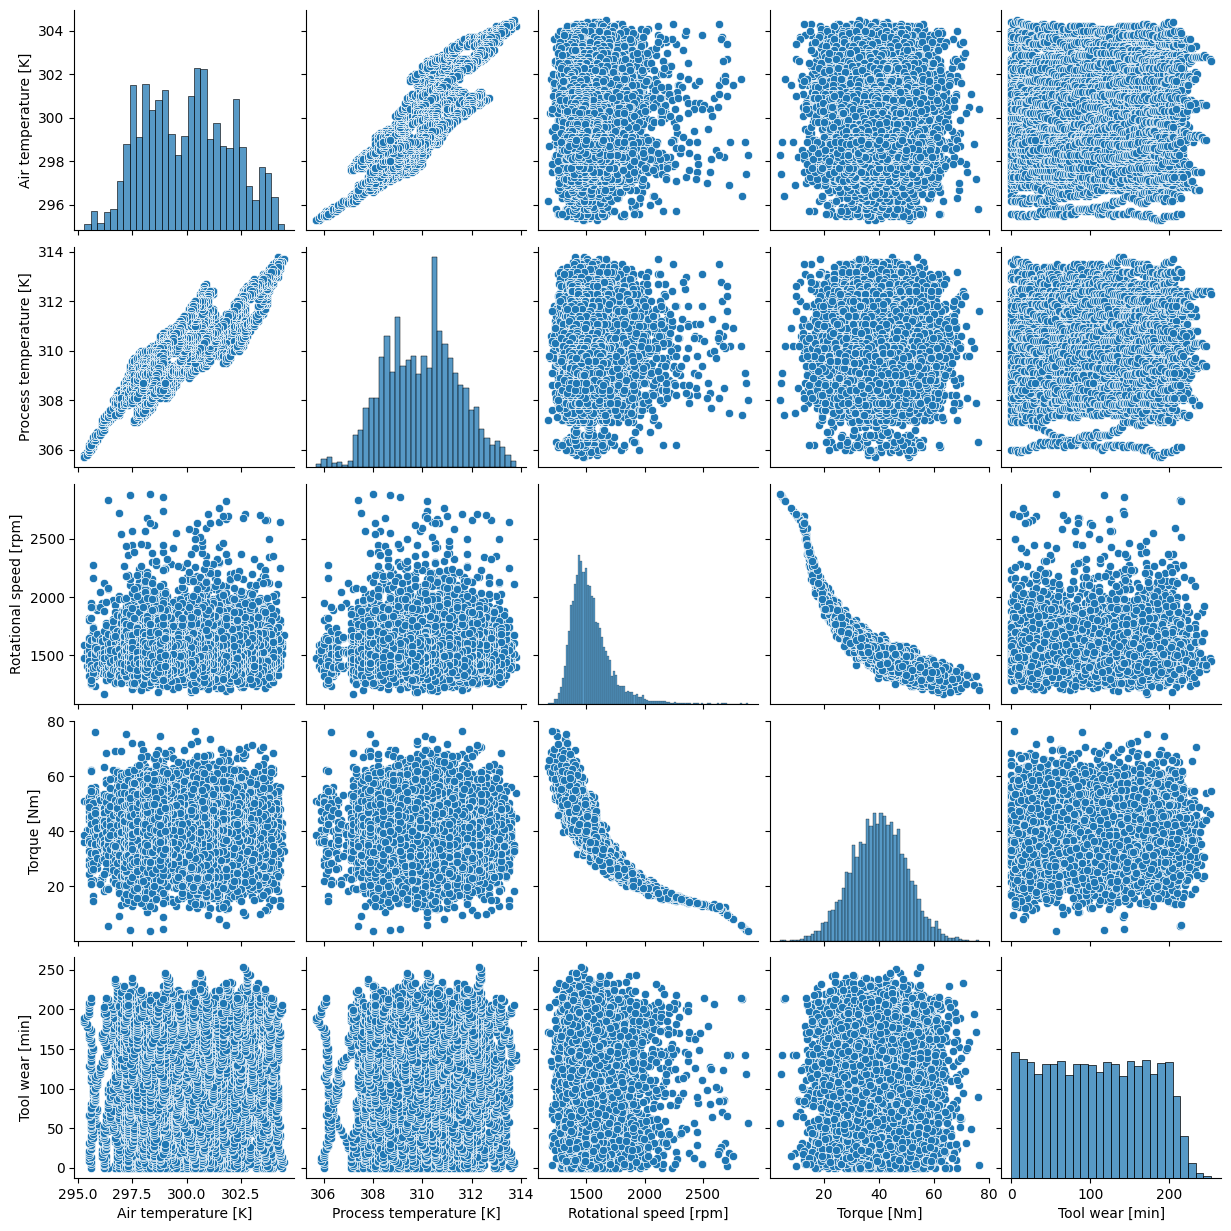

In [5]:
sns.pairplot(data = df.drop(['UDI', 'Target'], axis=1))

In [6]:
df['Power [W]'] = df['Torque [Nm]'] * (df['Rotational speed [rpm]'] * (np.pi)/60)
df['diffrences temperature [C]'] = (df['Process temperature [K]'] - df['Air temperature [K]'])
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Power [W],diffrences temperature [C]
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure,3475.795280,10.5
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure,3413.361362,10.5
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure,3874.693771,10.4
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure,2963.752329,10.4
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure,2948.908304,10.5
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure,2477.564686,9.6
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure,2717.351982,9.5
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure,2876.808753,9.6
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure,3575.551319,9.7


In [7]:
df.drop(['UDI', 'Failure Type', 'Product ID'], axis = 1).groupby('Type').mean()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Power [W],diffrences temperature [C]
Type,,,,,,,,
H,299.866999,309.925723,1538.147557,39.838285,107.419741,0.020937,3131.782616,10.058724
L,300.015833,310.012300,1539.469167,39.996600,108.378833,0.039167,3141.376319,9.996467
M,300.029263,310.018785,1537.598932,40.017251,107.272272,0.027694,3139.569199,9.989523


In [8]:
df.drop(['UDI', 'Failure Type', 'Product ID'], axis = 1).groupby('Type').describe()['Power [W]']

,count,mean,std,min,25%,50%,75%,max
Type,,,,,,,,
H,1003.0,3131.782616,518.239000,1717.739087,2776.476755,3133.215073,3475.151254,5046.821990
L,6000.0,3141.376319,536.915168,574.220305,2782.668311,3131.879896,3506.933699,5234.961502
M,2997.0,3139.569199,532.521239,1375.876211,2777.874764,3140.932919,3499.420057,5116.575819


<Axes: >

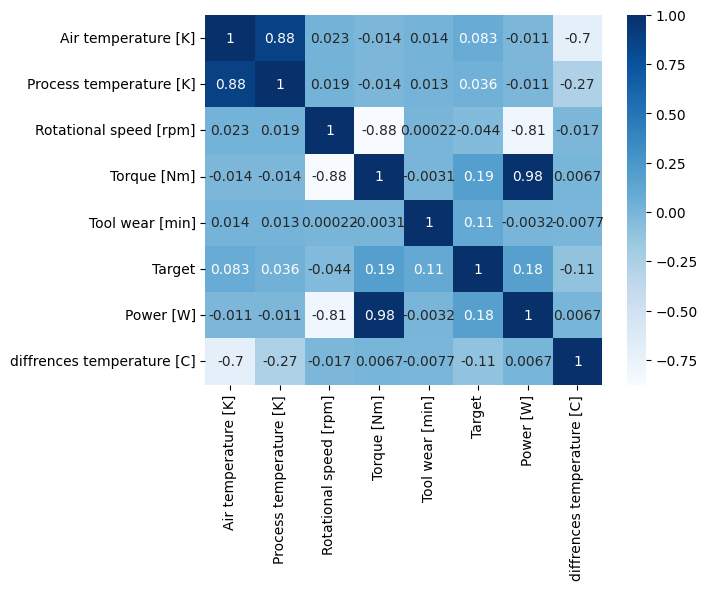

In [9]:
sns.heatmap(df.drop(['UDI', 'Product ID', 'Type', 'Failure Type',], axis = 1).corr(), annot=True, cmap="Blues")

# Data Visualisation

In [10]:
df.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type', 'Power [W]',
       'diffrences temperature [C]'],
      dtype='object')

C:\Users\Mohamed Atef\AppData\Local\Temp\ipykernel_19800\685738237.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  x = sns.countplot(data = df, x = col, palette='bright')
C:\Users\Mohamed Atef\AppData\Local\Temp\ipykernel_19800\685738237.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  x = sns.countplot(data = df, x = col, palette='bright')
C:\Users\Mohamed Atef\AppData\Local\Temp\ipykernel_19800\685738237.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  x = sns.countplot(data = df, x = col, palette='bright')


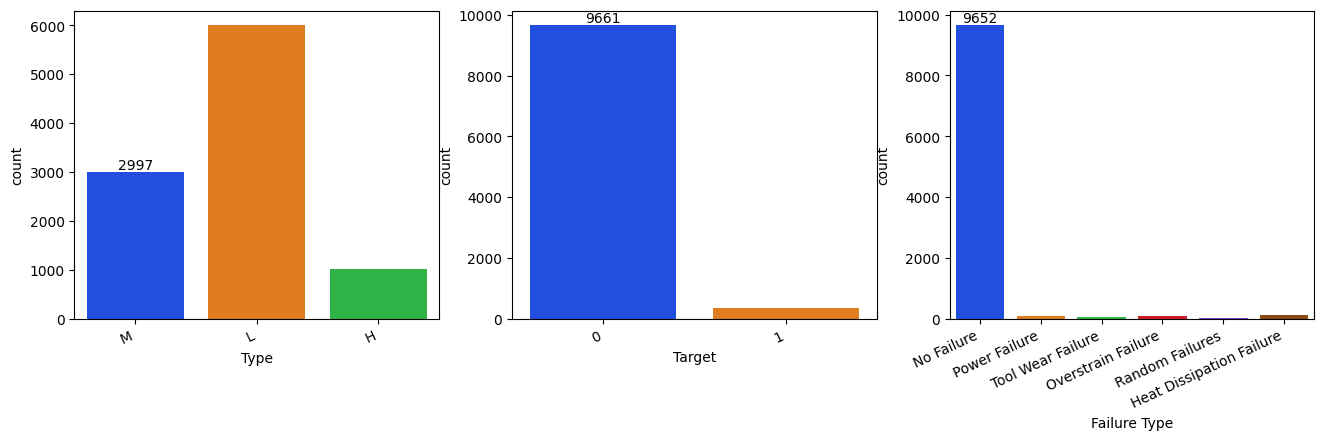

In [11]:
plt.figure(figsize=(16,4))
for i, col in enumerate(['Type', 'Target', 'Failure Type']):
    x = plt.subplot(1, 3, i+1)
    x = sns.countplot(data = df, x = col, palette='bright')
    x.bar_label(x.containers[0])
    plt.xticks(rotation=25, ha='right')

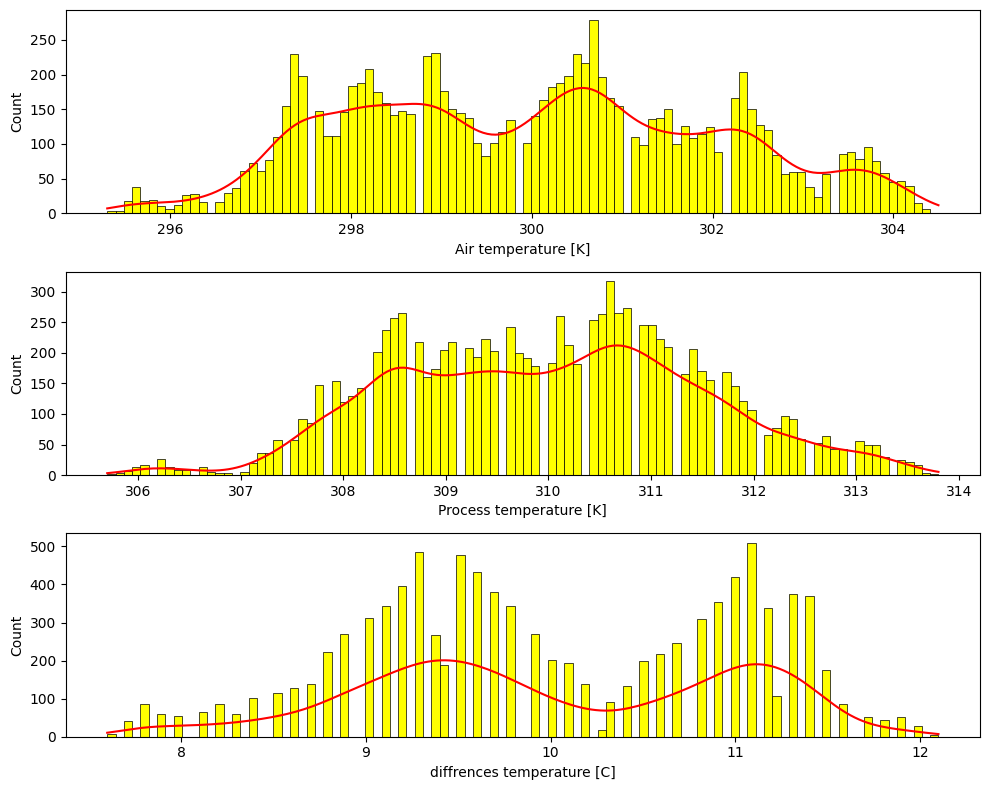

In [13]:
figure, axes = plt.subplots(3, 1, figsize=(10, 8))
for i, col in enumerate(['Air temperature [K]', 'Process temperature [K]', 'diffrences temperature [C]']):
    sns.histplot(data = df, x = col, bins = 100, kde=True, color='red', facecolor = "yellow", ax=axes[i])
plt.tight_layout()
plt.show()

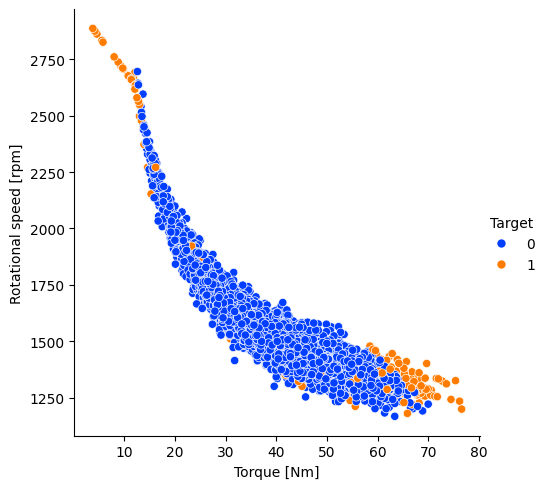

In [13]:
sns.relplot(data = df, x='Torque [Nm]', y='Rotational speed [rpm]', hue='Target', palette='bright')

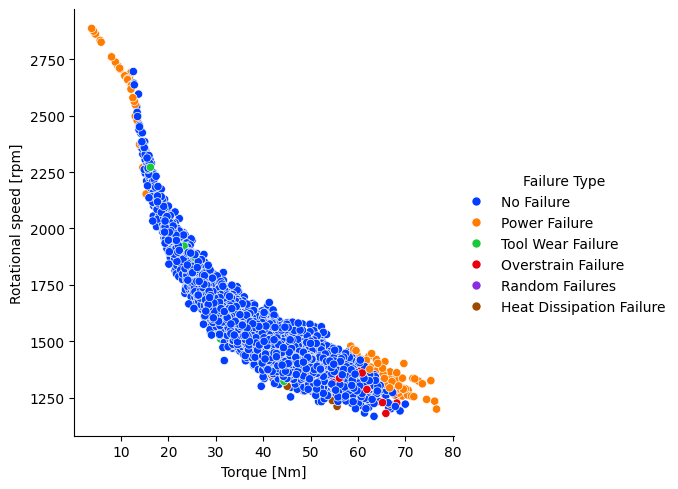

In [14]:
sns.relplot(data = df, x='Torque [Nm]', y='Rotational speed [rpm]', hue='Failure Type', palette='bright')

# Feature Selection

In [15]:
df.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type', 'Power [W]',
       'diffrences temperature [C]'],
      dtype='object')

In [16]:
df.drop(['UDI', 'Product ID', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Failure Type'], axis=1, inplace=True)
df

,Type,Tool wear [min],Target,Power [W],diffrences temperature [C]
0,M,0,0,3475.795280,10.5
1,L,3,0,3413.361362,10.5
2,L,5,0,3874.693771,10.4
3,L,7,0,2963.752329,10.4
4,L,9,0,2948.908304,10.5
...,...,...,...,...,...
9995,M,14,0,2477.564686,9.6
9996,H,17,0,2717.351982,9.5
9997,M,22,0,2876.808753,9.6
9998,H,25,0,3575.551319,9.7


In [17]:
# Mapping Type
type = {
    'L':1,
    'M':2,
    'H':3
}
df['Type'] = df['Type'].map(type)
df

,Type,Tool wear [min],Target,Power [W],diffrences temperature [C]
0,2,0,0,3475.795280,10.5
1,1,3,0,3413.361362,10.5
2,1,5,0,3874.693771,10.4
3,1,7,0,2963.752329,10.4
4,1,9,0,2948.908304,10.5
...,...,...,...,...,...
9995,2,14,0,2477.564686,9.6
9996,3,17,0,2717.351982,9.5
9997,2,22,0,2876.808753,9.6
9998,3,25,0,3575.551319,9.7


# Split Data to train and test sets

In [ ]:
from sklearn.model_selection import train_test_split

x = df.drop('Target', axis = 1)
y = df['Target']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15)

In [21]:
df['Target'].value_counts()

Target
0    9661
1     339
Name: count, dtype: int64

C:\Users\Mohamed Atef\AppData\Local\Temp\ipykernel_8468\3831392364.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x='Target', palette='bright')


<Axes: xlabel='Target', ylabel='count'>

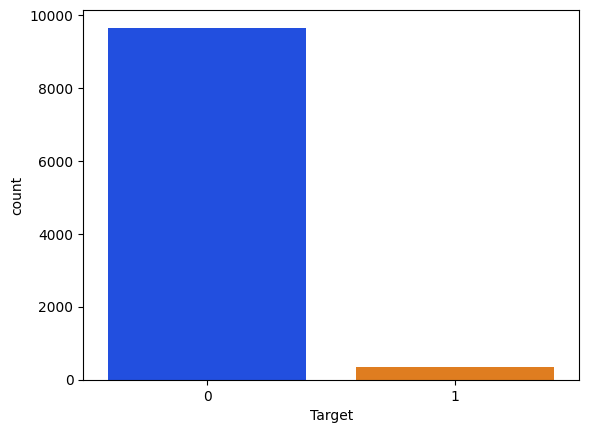

In [22]:
sns.countplot(data = df, x='Target', palette='bright')

# Handle Imbalanced Classes

In [ ]:
from imblearn.combine import SMOTETomek

sampler = SMOTETomek()
x = df.drop('Target', axis= 1)
y = df['Target']
x_train, y_train = sampler.fit_resample(x_train, y_train)

In [25]:
y_train.value_counts()

Target
0    7896
1    7896
Name: count, dtype: int64

# Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train) 
x_test = scaler.transform(x_test)

# Models

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, fbeta_score

# Testing some Models

In [29]:
models = {
    'Logistic Regression':LogisticRegression(),
    'KNN':KNeighborsClassifier(),
    'SVC':SVC(),
    'Decision Tree':DecisionTreeClassifier(),
    'Random Forest':RandomForestClassifier(),
    'XGB':XGBClassifier()
}

for name, model in models.items():
    print(f'Model: {name}')
    print('-' * 30)
    
    model.fit(x_train, y_train)
    
    y_prediction = model.predict(x_test)

    print(f'Confusion Matrix:\n {confusion_matrix(y_test, y_prediction)}')
    print(f'Accuracy: {accuracy_score(y_test, y_prediction)}')
    print(f'Precision: {precision_score(y_test, y_prediction)}')
    print(f'Recall: {recall_score(y_test, y_prediction)}')
    print(f'F1: {f1_score(y_test, y_prediction)}')
    print(f'F Bate: {fbeta_score(y_test, y_prediction, beta=1)}')

    print('\n')

Model: Logistic Regression
------------------------------
Confusion Matrix:
 [[1085  367]
 [  17   31]]
Accuracy: 0.744
Precision: 0.07788944723618091
Recall: 0.6458333333333334
F1: 0.13901345291479822
F Bate: 0.13901345291479822


Model: KNN
------------------------------
Confusion Matrix:
 [[1331  121]
 [  16   32]]
Accuracy: 0.9086666666666666
Precision: 0.20915032679738563
Recall: 0.6666666666666666
F1: 0.31840796019900497
F Bate: 0.31840796019900497


Model: SVC
------------------------------
Confusion Matrix:
 [[1325  127]
 [  11   37]]
Accuracy: 0.908
Precision: 0.22560975609756098
Recall: 0.7708333333333334
F1: 0.3490566037735849
F Bate: 0.3490566037735849


Model: Decision Tree
------------------------------
Confusion Matrix:
 [[1385   67]
 [  18   30]]
Accuracy: 0.9433333333333334
Precision: 0.30927835051546393
Recall: 0.625
F1: 0.41379310344827586
F Bate: 0.41379310344827586


Model: Random Forest
------------------------------
Confusion Matrix:
 [[1395   57]
 [  17   31]]
A

In [30]:
# model = XGBClassifier()
# model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [31]:
x.columns

Index(['Type', 'Tool wear [min]', 'Power [W]', 'diffrences temperature [C]'], dtype='object')

In [32]:
import joblib 

In [35]:
joblib.dump(x.columns, 'Columns.h5')
joblib.dump(scaler, 'Scaler.h5')
joblib.dump(model, 'Model.h5')

['Model.h5']